# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>



In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

import numpy as np
from numpy import log, exp, sqrt
import math
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

In [2]:
def Equilibration(vu,vg,orb,value):
    m=len(vu)
    x = [0, m]
    y = [value,value]
    fig, ((ax0,ax1)) = plt.subplots(1,2,figsize=(15,5),tight_layout=True)
    ax0.plot(vu)
    ax0.plot(x,y,'--k')
    ax0.set_ylabel('r  [$a_0$]')
    ax0.set_xlabel('# steps')
    ax0.set_title('\nEquilibration - '+orb+' ORBITAL\nUniform T(x|y) ',color='C0',fontsize=14)
    ax0.grid(alpha=0.4)
    
    ax1.plot(vg, color='orange')
    ax1.plot(x,y,'--k')
    ax1.set_ylabel('\nr  [$a_0$]')
    ax1.set_xlabel('# steps')
    ax1.set_title('\nEquilibration - '+orb+' ORBITAL\nGaussian T(x|y) ',color='C0',fontsize=14)
    ax1.grid(alpha=0.4)

In [3]:
def Statistical_Uncertainty(Ru,Rg,orb):
    M=1000000
    C=200
    L_min=10         # lunghezza minima del blocco 

    err_u=np.zeros(C)
    err_g=np.zeros(C)

    for l in range(C):
        n=l+1
        L=n*L_min
        N=int(M/L)

        u_ave_tot=0
        u_av2_tot=0
        g_ave_tot=0
        g_av2_tot=0

        for j in range(N):
            sum_u=0
            sum_g=0

            for k in range(L):
                i=j*L+k
                sum_u+=Ru[i]
                sum_g+=Rg[i]

            u_ave_tot+=sum_u/L
            u_av2_tot+=(sum_u/L)**2
            g_ave_tot+=sum_g/L
            g_av2_tot+=(sum_g/L)**2

        u_ave_tot/=N
        u_av2_tot/=N
        g_ave_tot/=N
        g_av2_tot/=N
        err_u[l]=math.sqrt((u_av2_tot-u_ave_tot**2)/N)
        err_g[l]=math.sqrt((g_av2_tot-g_ave_tot**2)/N)
    
    # P L O T
    x=np.arange(C)
    x*=L_min
    fig, ((ax0,ax1)) = plt.subplots(1,2,figsize=(15,5),tight_layout=True)
    font = FontProperties()
    font.set_name('Times New Roman')
    
    ax0.plot(x,err_u, linewidth = 0.7)
    ax0.set_xlabel('\n size of the block [# steps]',fontproperties=font)
    ax0.set_ylabel('statistical uncertainty    [$a_0$]\n',fontproperties=font)
    ax0.set_title('\n'+orb+' ORBITAL - Uniform $T(x|y)$\n Statistical uncertainties of $< r >$ for different size of the blocks',color='C0',fontsize=14)
    ax0.grid(alpha=0.4)
    
    ax1.plot(x,err_g, linewidth = 0.7,color='orange')
    ax1.set_xlabel('\n size of the block [# steps]',fontproperties=font)
    ax1.set_ylabel('statistical uncertainty    [$a_0$]\n',fontproperties=font)
    ax1.set_title('\n'+orb+' ORBITAL - Gaussian $T(x|y)$\n Statistical uncertainties of $< r >$ for different size of the blocks',color='C0',fontsize=14)
    ax1.grid(alpha=0.4)
    plt.show()

In [4]:
def comparison(u,err_u,g,err_g,ystring,orbital,pos):
    fig, ax = plt.subplots(figsize=(10,5))
    
    n=len(g)
    x=np.arange(n)
    X = [0, 100]
    Y = [0,0]
    
    ax.errorbar(x,u,yerr=err_u, label='uniform $T(x|y)$')
    ax.errorbar(x,g,yerr=err_g, label='gaussian $T(x|y)$')
    ax.plot(X,Y,'k--',alpha=0.8,color='black')
    
    plt.xlabel('# blocks')
    plt.ylabel(ystring)
    ax.set_title('\n'+orbital+' - Comparison between results',color='C0',fontsize=15)
    
    legend = ax.legend(loc=pos+' right', shadow=False, framealpha=1., fontsize='x-large')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    
    plt.grid(alpha=0.4)
    plt.show()

In [5]:
# grafico 3D

def graphic_3D(X_,Y_,Z_):
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    
    ax.scatter(X_, Y_, Z_, c=Z_,s=8, depthshade=True, marker='.')
    ax.set_xlabel('x  [$a_0$]')
    ax.set_ylabel('y  [$a_0$]')
    ax.set_zlabel('z  [$a_0$]')
    ax.view_init(10, 30)
    plt.show()

In [6]:
def Histogram4(x,y,z,x2,y2,z2,title,pos):
    n = len(x)
    r = np.zeros(n)
    r2 = np.zeros(n)
    r = (x*x + y*y + z*z)**(1/2)
    r2 = (x2*x2 + y2*y2 + z2*z2)**(1/2)
    
    fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(15,11),tight_layout=True)
    ax0.hist(r,100, density=True, histtype='step', label='Uniform $T(x|y)$', stacked=True, fill=False)
    ax0.hist(r2,100, density=True, histtype='step', label='Gaussian  $T(x|y)$', stacked=True, fill=False)
    ax0.set_xlabel('r  [$a_0$]')
    ax0.set_title('\n'+title+'\n Distribution of "instant" distances with respect to the origin',color='C0',fontsize=14)
    legend = ax0.legend(loc='upper right', shadow=True)
    ax0.grid(alpha=0.4)
    
    ax1.hist(x,100, density=True, histtype='step', label='Uniform $T(x|y)$', stacked=True, fill=False)
    ax1.hist(x2,100, density=True, histtype='step', label='Gaussian  $T(x|y)$', stacked=True, fill=False)
    ax1.set_xlabel('\n x  [$a_0$]')
    ax1.set_ylabel('\n')
    ax1.set_title('\n'+title+'\n Distribution of "instant" x coordinate',color='C0',fontsize=14)
    legend = ax1.legend(loc='upper right', shadow=True)
    ax1.grid(alpha=0.4)
    
    ax2.hist(y,100, density=True, histtype='step', label='Uniform $T(x|y)$', stacked=True, fill=False)
    ax2.hist(y2,100, density=True, histtype='step', label='Gaussian  $T(x|y)$', stacked=True, fill=False)
    ax2.set_xlabel('\n y  [$a_0$]')
    ax2.set_ylabel('\n')
    ax2.set_title('\n'+title+'\n Distribution of "instant" y coordinate',color='C0',fontsize=14)
    legend = ax2.legend(loc='upper right', shadow=True)
    ax2.grid(alpha=0.4)
    
    ax3.hist(z,100, density=True, histtype='step', label='Uniform $T(x|y)$', stacked=True, fill=False)
    ax3.hist(z2,100, density=True, histtype='step', label='Gaussian  $T(x|y)$', stacked=True, fill=False)
    ax3.set_xlabel('\n z  [$a_0$]')
    ax3.set_ylabel('\n')
    ax3.set_title('\n'+title+'\n Distribution of "instant" z coordinate',color='C0',fontsize=14)
    legend = ax3.legend(loc='upper '+pos, shadow=True)
    ax3.grid(alpha=0.4)
    
    plt.show()

## <font face = "Tahoma" style="color:black">Esercizio 05.1</font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5"> 
Il codice usato per calcolare $<r>$ è situato nella cartella <font face="Courier">/Lecture05/MC_Idrogeno</font>.<br>
    Esso utilizza l'algoritmo di Metropolis, campionando $T(x|y)$ simmetrica (uniforme/gaussiana) e usando la <b>regola empirica</b> per settare l'accettazione al $50\%$. 
    </p>

### <font face = "Tahoma" style="color:teal"><b>Incertezza statistica in funzione della lunghezza dei blocchi</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Dopo aver equilibrato ogni volta il sistema, lancio quattro simulazioni da $M=10^6$ steps che memorizzano i valori istantanei della posizione $r$ dell'elettrone in unità del raggio di Bohr $a_0$: due per l'orbitale $1s$ utilizzando una volta $T(x|y)$ uniforme e una volta $T(x|y)$ gaussiana, le altre due per l'orbitale $2p$ utilizzando in modo analogo le $T(x|y)$.
    <br>Uso i dati per studiare - tramite tecnica del data blocking - la stima delle incertezze statistiche associate a $<r>$ per diverse dimensioni dei blocchi, da $ L = M / N =10$ a $L= M / N =2000.$
    Seguono i plot delle incertezze in funzione della lunghezza dei blocchi. Quando il valore dell'incertezza inizia a saturare significa che la lunghezza del blocco è sufficientemente grande per effettuare una simulazione: le misure in questo caso saranno scorrelate, in quanto il tempo di correlazione è minore rispetto a quello che intercorre tra due blocchi successivi.
    </p>

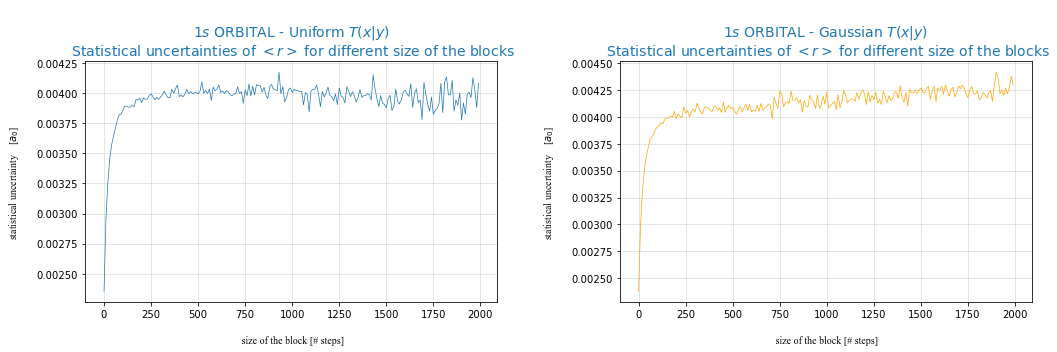

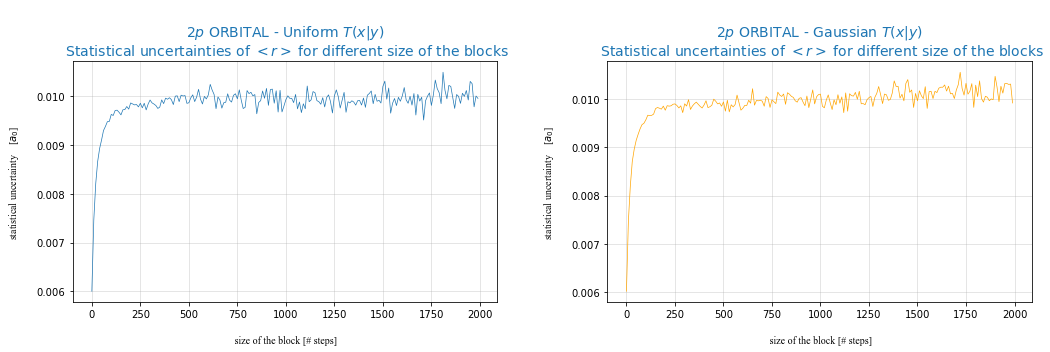

In [7]:
# calcolo il valore dell'incertezza al variare della lunghezza L del blocco
r = np.loadtxt(fname='Lecture05/Instant_100_un/output.xyz.dat',usecols=3)
r_ = np.loadtxt(fname='Lecture05/Instant_100_ga/output.xyz.dat',usecols=3)
s = np.loadtxt(fname='Lecture05/Instant_210_un/output.xyz.dat',usecols=3)
s_ = np.loadtxt(fname='Lecture05/Instant_210_ga/output.xyz.dat',usecols=3)

Statistical_Uncertainty(r,r_,'$1s$')
Statistical_Uncertainty(s,s_,'$2p$')

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per entrambi gli orbitali, le incertezze delle simulazioni con $T(x|y)$ uniforme iniziano a saturare per $L=500$ steps. Quelle delle simulazioni con $T(x|y)$ gaussiana saturano a partire da un numero maggiore di steps.
    </p>

<br><br>

### <font face = "Tahoma" style="color:teal"><b>Stima di $<r>_{\Psi_{1,0,0}}$</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Nelle due simulazioni per l'orbitale $1s$, parto dal punto di coordinate $(x_{start},y_{start},z_{start})=(0,0,0)$.  Prima di ogni simulazione eseguo l'equilibrazione.
    </p>

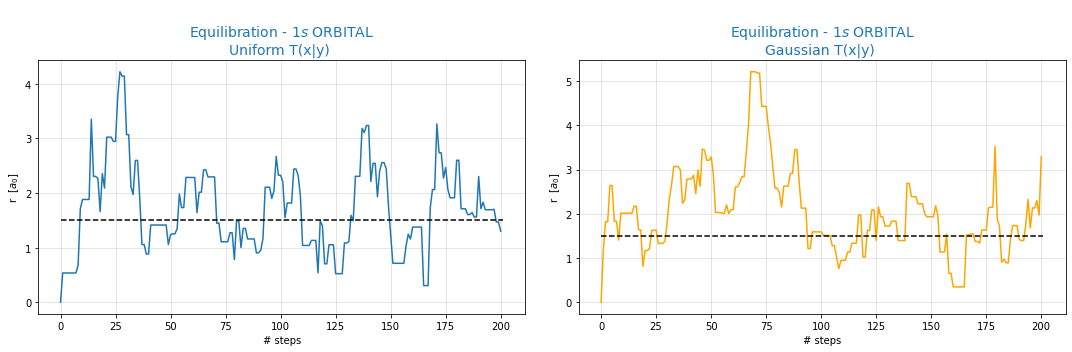

In [8]:
r1u = np.loadtxt(fname='Lecture05/100_uniform/equilibrate.xyz.dat',usecols=3)
r1g = np.loadtxt(fname='Lecture05/100_gaussian/equilibrate.xyz.dat',usecols=3)
Equilibration(r1u,r1g,'$1s$',3/2)

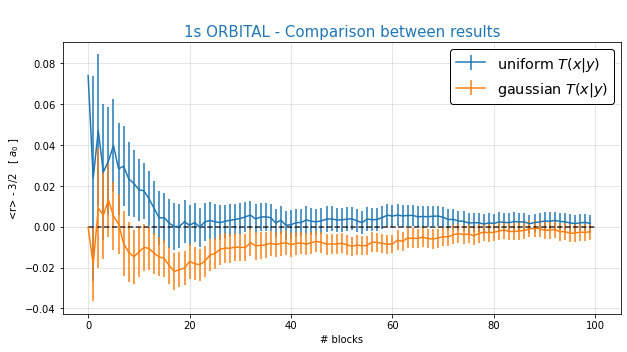


<r_{uniform}> = ( 1.50159  +/-  0.00410861 ) a_0  

<r_{gaussian}> = ( 1.49755  +/-  0.00418471 ) a_0  



In [9]:
u_100 = np.loadtxt(fname='Lecture05/100_uniform/output.distance.dat',usecols=2)
u_err_100 = np.loadtxt(fname='Lecture05/100_uniform/output.distance.dat',usecols=3)
g_100 = np.loadtxt(fname='Lecture05/100_gaussian/output.distance.dat',usecols=2)
g_err_100 = np.loadtxt(fname='Lecture05/100_gaussian/output.distance.dat',usecols=3)
comparison(u_100-3/2,u_err_100,g_100-3/2,g_err_100,'<r> - 3/2   [ $a_0$ ]','1s ORBITAL','upper')

print("\n<r_{uniform}> = (",u_100[99]," +/- ",u_err_100[99],") a_0  \n")
print("<r_{gaussian}> = (",g_100[99]," +/- ",g_err_100[99],") a_0  \n")

In [10]:
X_100_u = np.loadtxt(fname='Lecture05/100_uniform/output.xyz.dat',usecols=0)
Y_100_u = np.loadtxt(fname='Lecture05/100_uniform/output.xyz.dat',usecols=1)
Z_100_u = np.loadtxt(fname='Lecture05/100_uniform/output.xyz.dat',usecols=2)
X_100_g = np.loadtxt(fname='Lecture05/100_gaussian/output.xyz.dat',usecols=0)
Y_100_g = np.loadtxt(fname='Lecture05/100_gaussian/output.xyz.dat',usecols=1)
Z_100_g = np.loadtxt(fname='Lecture05/100_gaussian/output.xyz.dat',usecols=2)

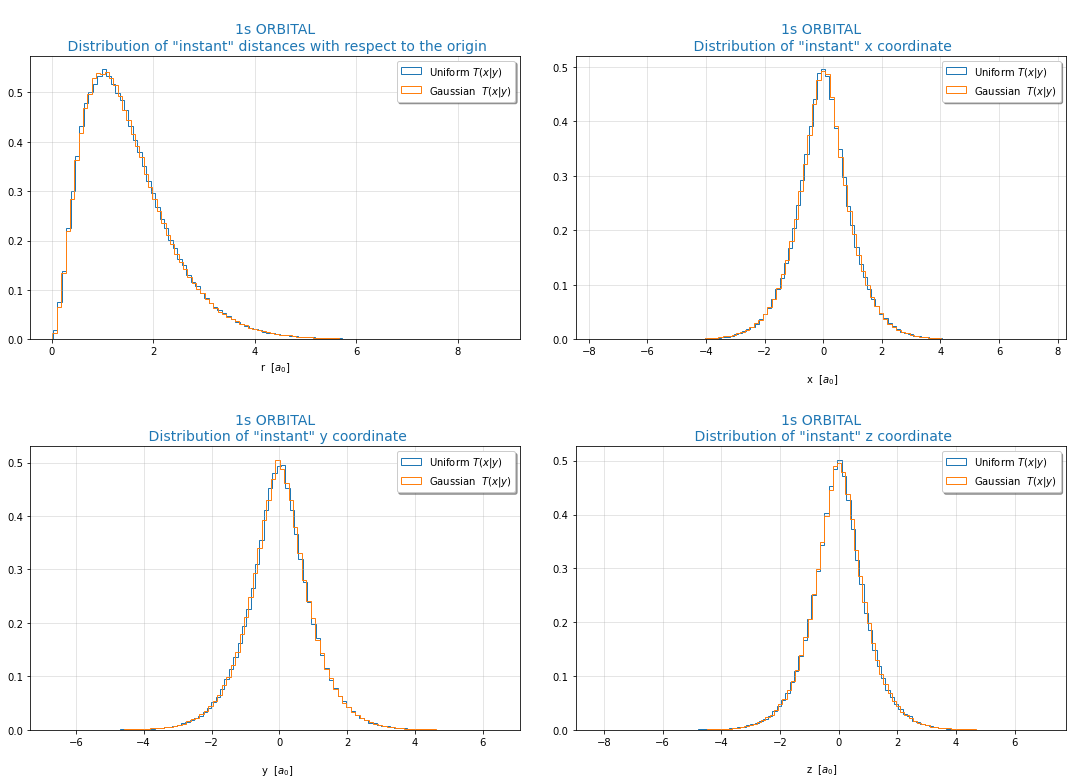

In [11]:
Histogram4(X_100_u, Y_100_u, Z_100_u,X_100_g, Y_100_g, Z_100_g,'1s ORBITAL','right')


Shape of 1s ORBITAL for uniform T(x|y)


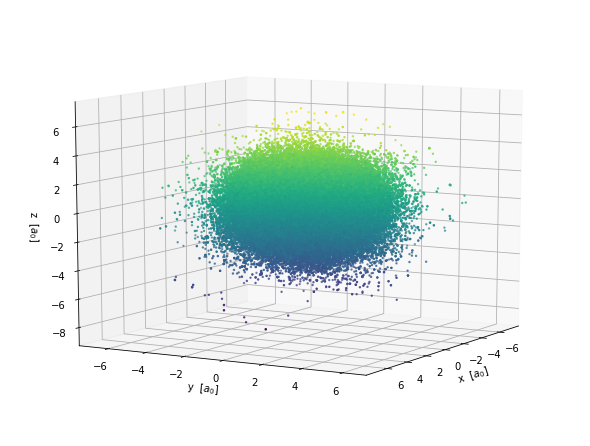



Shape of 1s ORBITAL for gaussian T(x|y)


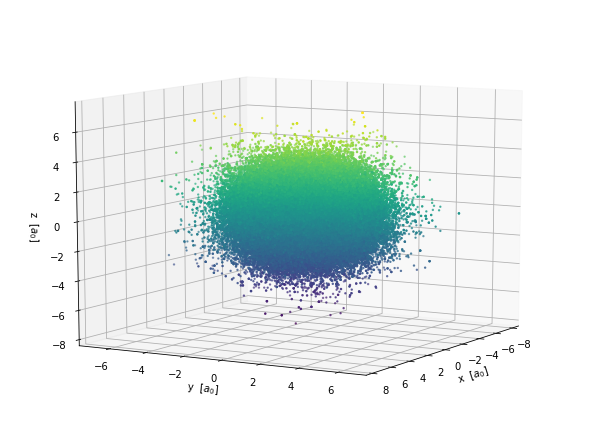

In [12]:
print('\nShape of 1s ORBITAL for uniform T(x|y)')
graphic_3D(X_100_u, Y_100_u, Z_100_u)
print('\n\nShape of 1s ORBITAL for gaussian T(x|y)')
graphic_3D(X_100_g, Y_100_g, Z_100_g)

<br><br>

### <font face = "Tahoma" style="color:teal"><b>Stima di $<r>_{\Psi_{2,1,0}}$</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Nelle due simulazioni per l'orbitale $2p$, parto dal punto di coordinate $(x_{start},y_{start},z_{start})=(1.9,1.9,1.9)$. Anche qui prima di ogni simulazione eseguo l'equilibrazione.
    </p>

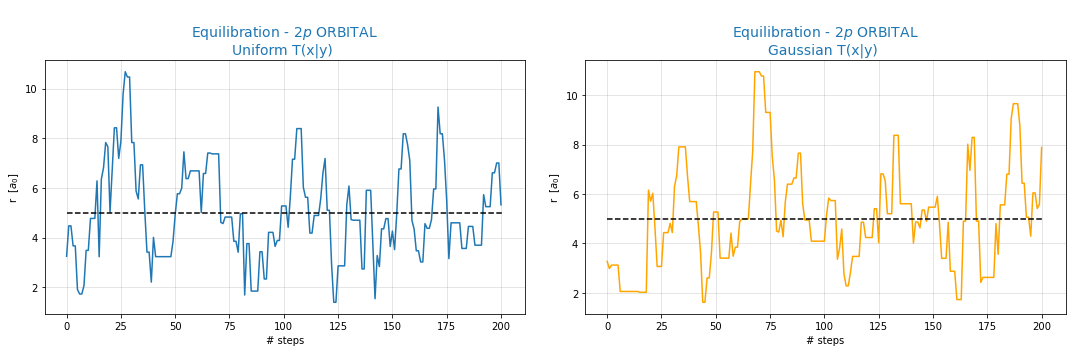

In [13]:
r2u = np.loadtxt(fname='Lecture05/210_uniform/equilibrate.xyz.dat',usecols=3)
r2g = np.loadtxt(fname='Lecture05/210_gaussian/equilibrate.xyz.dat',usecols=3)
Equilibration(r2u,r2g,'$2p$',5)

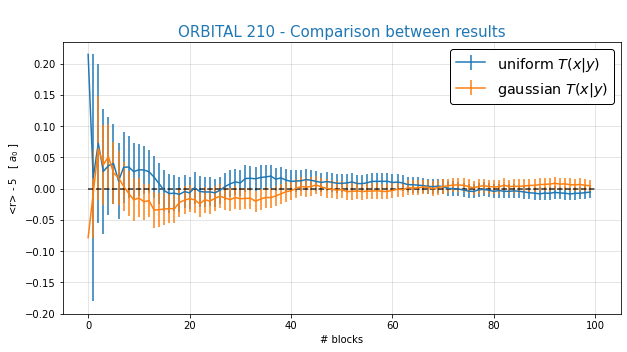


<r_{uniform}> = ( 4.99447  +/-  0.0098947 ) a_0 

<r_{gaussian}> = ( 5.00442  +/-  0.0098046 ) a_0 



In [14]:
u_210 = np.loadtxt(fname='Lecture05/210_uniform/output.distance.dat',usecols=2)
u_err_210 = np.loadtxt(fname='Lecture05/210_uniform/output.distance.dat',usecols=3)
g_210 = np.loadtxt(fname='Lecture05/210_gaussian/output.distance.dat',usecols=2)
g_err_210 = np.loadtxt(fname='Lecture05/210_gaussian/output.distance.dat',usecols=3)
comparison(u_210-5,u_err_210,g_210-5,g_err_210,'<r> - 5   [ $a_0$ ]','ORBITAL 210','upper')
print("\n<r_{uniform}> = (",u_210[99]," +/- ",u_err_210[99],") a_0 \n")
print("<r_{gaussian}> = (",g_210[99]," +/- ",g_err_210[99],") a_0 \n")

In [15]:
X_210_u = np.loadtxt(fname='Lecture05/210_uniform/output.xyz.dat',usecols=0)
Y_210_u = np.loadtxt(fname='Lecture05/210_uniform/output.xyz.dat',usecols=1)
Z_210_u = np.loadtxt(fname='Lecture05/210_uniform/output.xyz.dat',usecols=2)
X_210_g = np.loadtxt(fname='Lecture05/210_gaussian/output.xyz.dat',usecols=0)
Y_210_g = np.loadtxt(fname='Lecture05/210_gaussian/output.xyz.dat',usecols=1)
Z_210_g = np.loadtxt(fname='Lecture05/210_gaussian/output.xyz.dat',usecols=2)

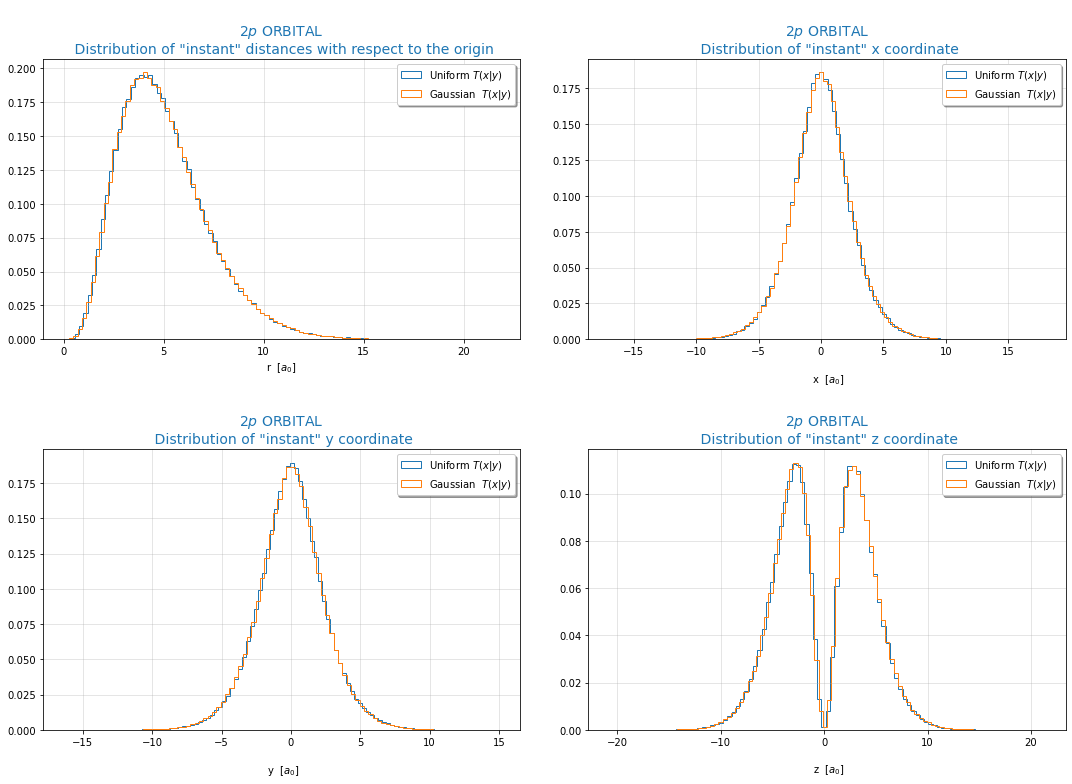

In [16]:
Histogram4(X_210_u, Y_210_u, Z_210_u,X_210_g, Y_210_g, Z_210_g,'$2p$ ORBITAL','right')


Shape of 2p ORBITAL for uniform T(x|y)


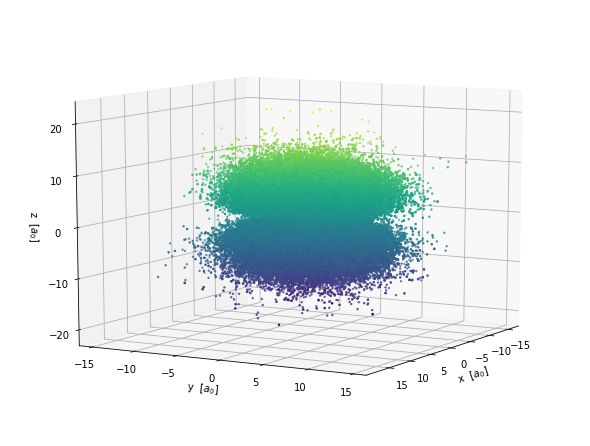



Shape of 2p ORBITAL for gaussian T(x|y)


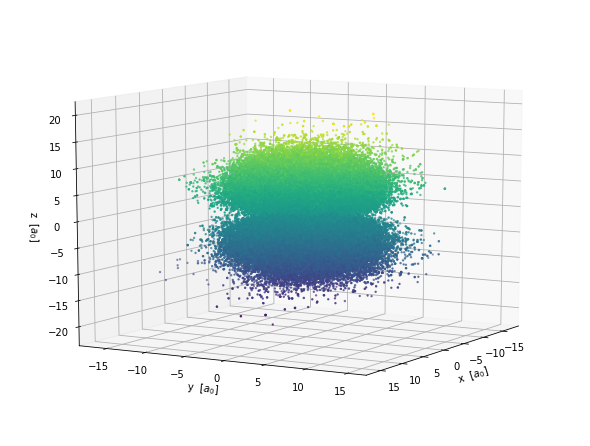

In [17]:
print('\nShape of 2p ORBITAL for uniform T(x|y)')
graphic_3D(X_210_u,Y_210_u,Z_210_u)
print('\n\nShape of 2p ORBITAL for gaussian T(x|y)')
graphic_3D(X_210_g,Y_210_g,Z_210_g)

___________
___________
<br>

### <font face = "Tahoma" style="color:teal"><b>Stima di $<r>_{\Psi_{1,0,0}}$ partendo da GRANDE DISTANZA dall'origine</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Faccio due simulazioni da $10^6$ steps che partono dal punto di coordinate $(x_{start},y_{start},z_{start})=(20,20,20)$, utilizzando una volta $T(x|y)$ uniforme e una volta $T(x|y)$ gaussiana. Stampo per entrambe tutte le posizioni istantanee senza usare il metodo a blocchi e senza previa equilibrazione del sistema.
    <br> Nel grafico che segue plotto le prime $500$ posizioni per valutare quanto ci mette il sistema ad equilibrarsi.
    </p>

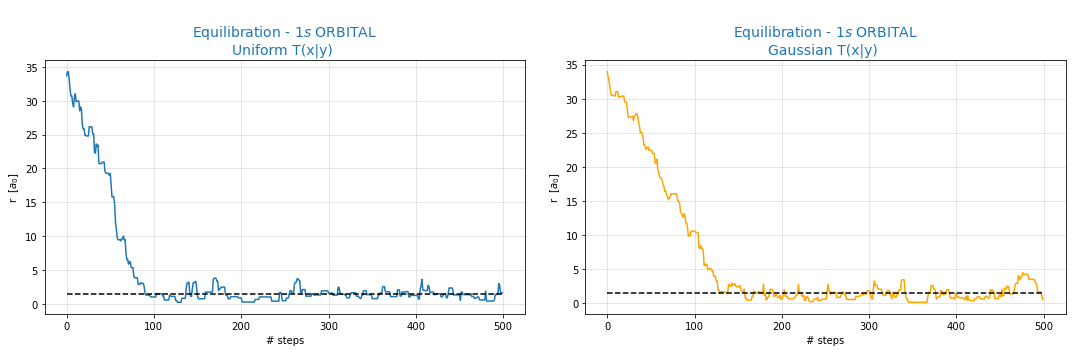

In [18]:
u = np.loadtxt(fname='Lecture05/100_unif_longdistance/output.xyz.dat',usecols=3)
g = np.loadtxt(fname='Lecture05/100_gauss_longdistance/output.xyz.dat',usecols=3)
u_ = np.zeros(500)
g_ = np.zeros(500)
for i in range(500):
    u_[i]=u[i]
    g_[i]=g[i]
Equilibration(u_,g_,'$1s$',3/2)

In [19]:
X = np.loadtxt(fname='Lecture05/100_unif_longdistance/output.xyz.dat',usecols=0)
Y = np.loadtxt(fname='Lecture05/100_unif_longdistance/output.xyz.dat',usecols=1)
Z = np.loadtxt(fname='Lecture05/100_unif_longdistance/output.xyz.dat',usecols=2)

In [20]:
X2 = np.loadtxt(fname='Lecture05/100_gauss_longdistance/output.xyz.dat',usecols=0)
Y2 = np.loadtxt(fname='Lecture05/100_gauss_longdistance/output.xyz.dat',usecols=1)
Z2 = np.loadtxt(fname='Lecture05/100_gauss_longdistance/output.xyz.dat',usecols=2)

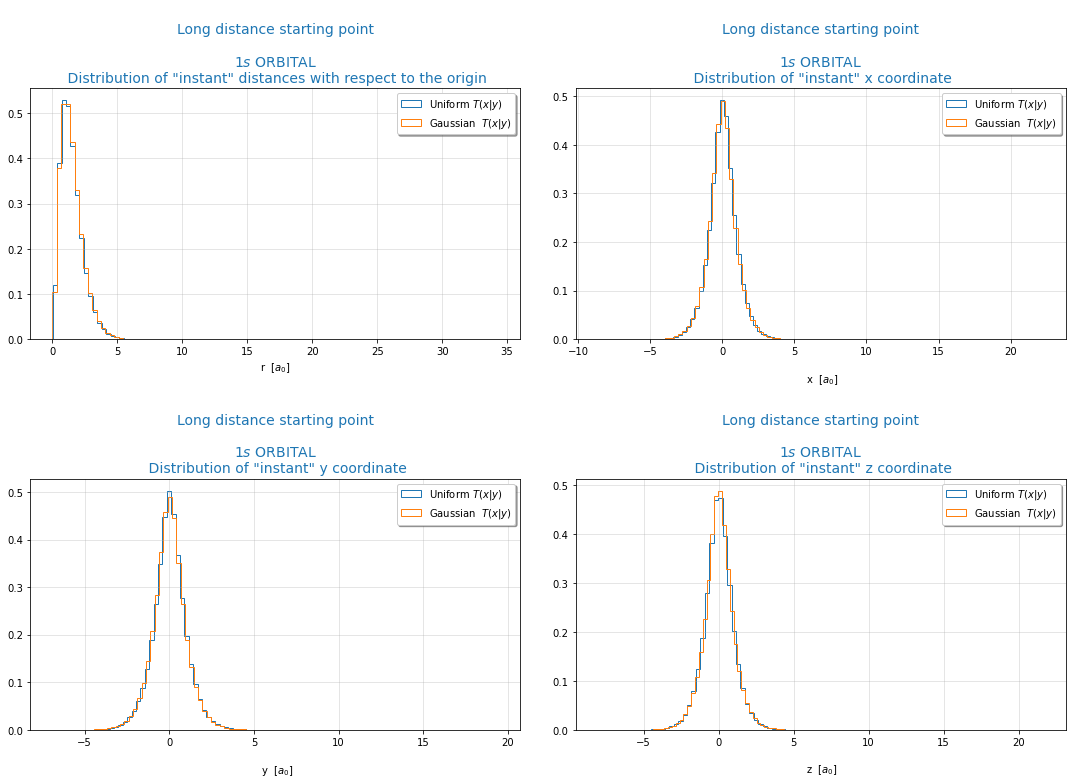

In [21]:
Histogram4(X, Y, Z, X2, Y2, Z2,'Long distance starting point\n\n$1s$ ORBITAL','right')


Shape of 1s ORBITAL for uniform T(x|y)
Long distance starting point


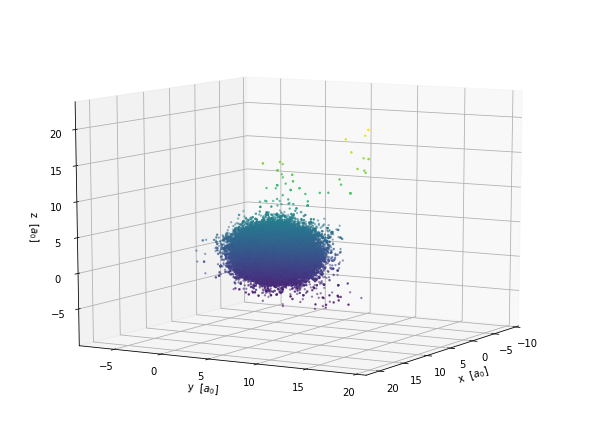



Shape of 1s ORBITAL for gaussian T(x|y)
Long distance starting point


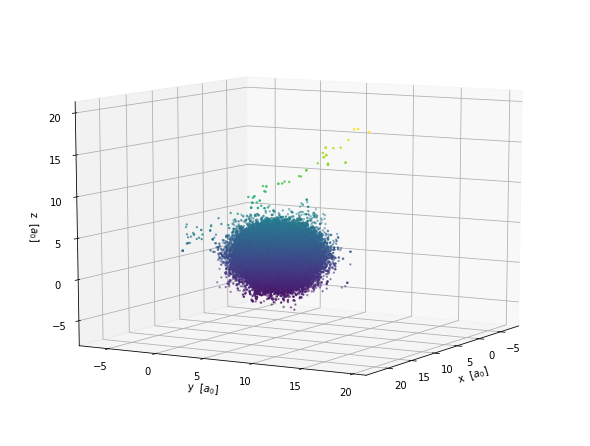

In [22]:
print('\nShape of 1s ORBITAL for uniform T(x|y)\nLong distance starting point')
graphic_3D(X, Y, Z)
print('\n\nShape of 1s ORBITAL for gaussian T(x|y)\nLong distance starting point')
graphic_3D(X2, Y2, Z2)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Dai grafici $3D$ si vede un certo numero di punti fuori dalla forma classica dell'orbitale $1s$; questi sono in numero sufficiente da alterare i risultati della simulazione se non si equilibra adeguatamente il sistema. Partendo da un punto lontano dall'origine infatti, il campionamento della distribuzione va a visitare anche punti lontani dal suo massimo. <br>Dunque <b>sono necessari circa $150/200$ steps di equilibrazione prima di far partire le simulazioni a blocchi</b>. E' da notare che nei casi precedenti equilibravo già il sistema con 200 steps - vedere codice - anche se per quelle ne sarebbero bastati meno, dato che facevo partire la simulazione da punti già nel range standard di oscillazione della posizione per Metropolis.
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    La cosa secondo me importante da notare qui è che <b>l'algoritmo di Metropolis - anche facendo partire la simulazione da un punto lontano - riesce a riportare velocemente il campionamento della distribuzione di probabilità verso il suo picco</b>. Per questo motivo sia i grafici 3D che gli istogrammi mostrano che la maggior parte dei punti viene campionata dove la distribuzione ha valori più alti.
    </p>

<br><br>
### <font face = "Tahoma" style="color:teal"><b>Stima di $<r>_{\Psi_{2,1,0}}$ partendo da GRANDE DISTANZA dall'origine</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per l'orbitale $2p$ provo a partire da <b>ancor più lontano</b>: setto lo start sul punto di coordinate $(x_{start},y_{start},z_{start})=(20,-20,-100)$, avviando una simulazione con $T(x|y)$ uniforme e un'altra con $T(x|y)$ gaussiana. Stampo per entrambe tutte le posizioni istantanee senza usare il metodo a blocchi.
    <br> Nei grafici che seguo plotto le prime $2200$ posizioni per valutare quanto ci mette il sistema ad equilibrarsi.
    </p>

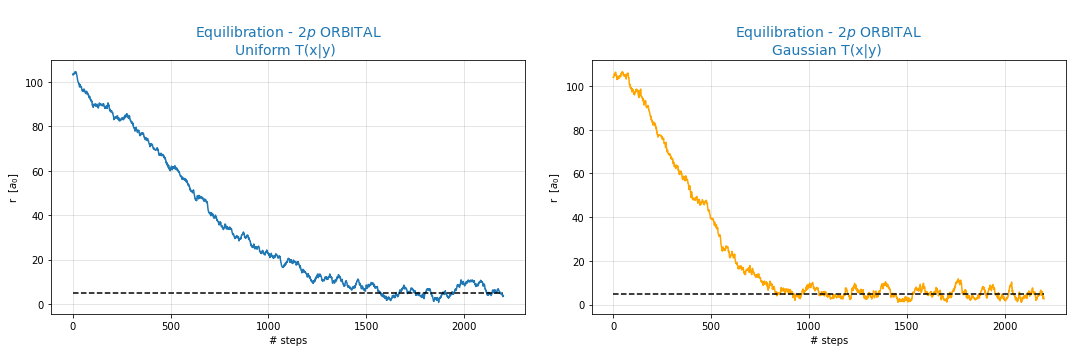

In [23]:
U = np.loadtxt(fname='Lecture05/210_unif_longdistance/output.xyz.dat',usecols=3)
G = np.loadtxt(fname='Lecture05/210_gauss_longdistance/output.xyz.dat',usecols=3)
U_ = np.zeros(2200)
G_ = np.zeros(2200)
for i in range(2200):
    U_[i]=U[i]
    G_[i]=G[i]
Equilibration(U_,G_,'$2p$',5)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Prima di far partire un'eventuale simulazione a blocchi <b>è opportuno equilibrare il sistema per almeno $1500/2000$ steps nel caso uniforme, e per almeno $1000$ steps nel caso gaussiano</b>. A livello di tempo di calcolo, evidentemente non è conveniente far partire le simulazioni da un punto così lontano; è più opportuno partire da una distanza $|\vec{r}|$ dell'ordine dell'unità.
    </p>
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Plotto ora gli istogrammi e i grafici 3D delle simulazioni <b>non equilibrate</b> appena eseguite.
    </p>

In [24]:
X_ = np.loadtxt(fname='Lecture05/210_unif_longdistance/output.xyz.dat',usecols=0)
Y_ = np.loadtxt(fname='Lecture05/210_unif_longdistance/output.xyz.dat',usecols=1)
Z_ = np.loadtxt(fname='Lecture05/210_unif_longdistance/output.xyz.dat',usecols=2)
X2_ = np.loadtxt(fname='Lecture05/210_gauss_longdistance/output.xyz.dat',usecols=0)
Y2_ = np.loadtxt(fname='Lecture05/210_gauss_longdistance/output.xyz.dat',usecols=1)
Z2_ = np.loadtxt(fname='Lecture05/210_gauss_longdistance/output.xyz.dat',usecols=2)

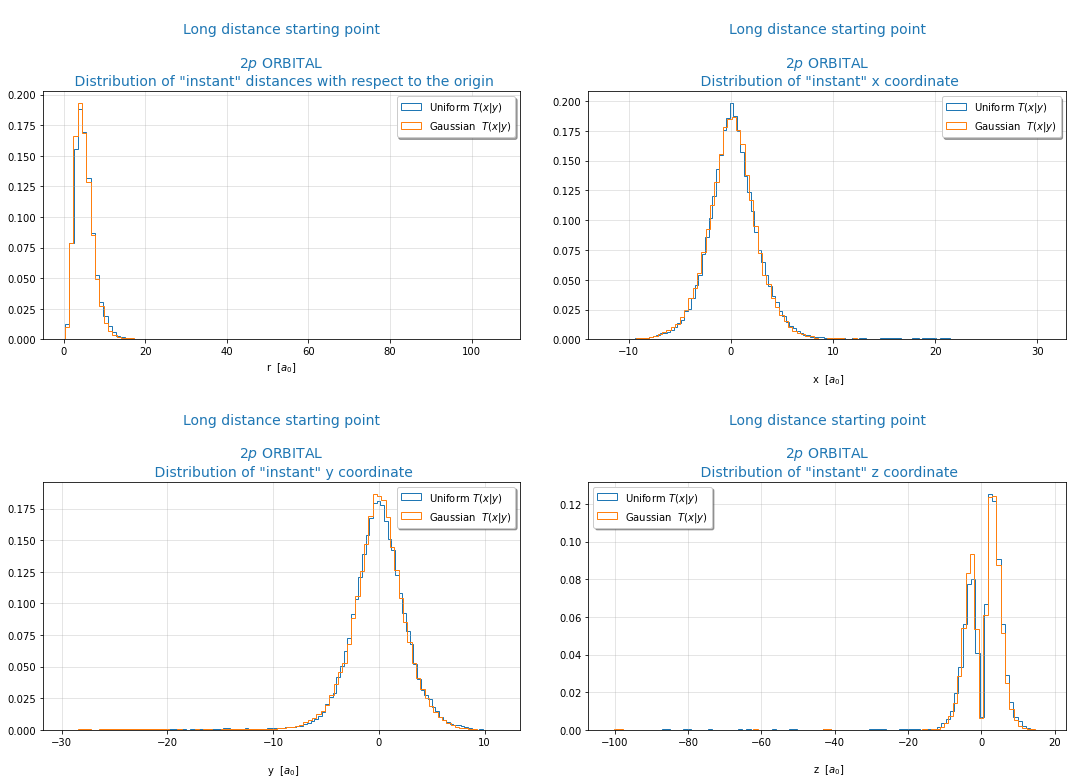

In [25]:
Histogram4(X_, Y_, Z_, X2_, Y2_, Z2_,'Long distance starting point\n\n$2p$ ORBITAL','left')


Shape of 2p ORBITAL for uniform T(x|y)
Long distance starting point


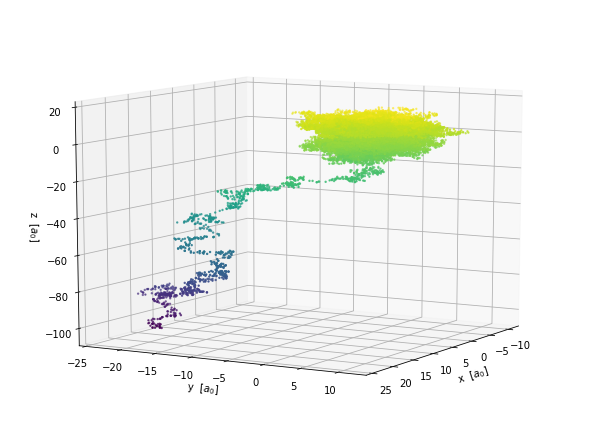



Shape of 2p ORBITAL for gaussian T(x|y)
Long distance starting point


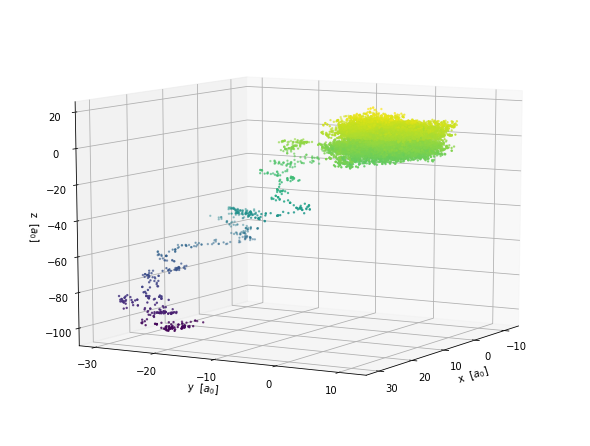

In [26]:
print('\nShape of 2p ORBITAL for uniform T(x|y)\nLong distance starting point')
graphic_3D(X_, Y_, Z_)
print('\n\nShape of 2p ORBITAL for gaussian T(x|y)\nLong distance starting point')
graphic_3D(X2_, Y2_, Z2_)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Dal grafico $3D$ si nota che la forma della distribuzione viene in parte conservata, sebbene in maniera evidentemente distorta. Gli istogrammi mostrano che la simulazione con $T(x|y)$ gaussiana conserva maggiormente tale distribuzione; questo è in accordo con il fatto che il caso gaussiano equilibra prima rispetto a quello uniforme.
    <br>
    Per entrambe le simulazioni, l'algoritmo di Metropolis riesce a riportare il campionamento della distribuzione di probabilità verso il suo picco, ma in modo meno efficace rispetto al caso $1s$ a grande distanza: lo starting point qui è sufficientemente lontano da concentrare un consistente numero di punti lontano dai picchi della distribuzione.
    </p>
    
    